# Feature Extraction and Dimensionality Reduction

Explore model outputs from feature extraction and perform dimensionality reduction using UMAP to identify whether there is any observed correlation in the extracted features.

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

logdir_expf = lambda exp_dir: Path(cfg['data_dir'], 'logs', exp_dir)

Load config file >> ../config/config.yaml


## Plot Functions

In [2]:
import umap
import matplotlib as mpl

random_state = 42

def plot_umapembedding(mapper, label, ndim0=0, ndim1=1, labelname=''):
    """Plot 2D embedding of UMAP"""
    if not isinstance(mapper, np.ndarray):
        mapper = mapper.embedding_
    fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(box_aspect=1))
    cmap = mpl.colors.ListedColormap(mpl.colormaps['BuPu'](np.linspace(0.05, 1., 256)))
    scatter = ax.scatter(mapper[:, ndim0], mapper[:, ndim1], s=5, c=label, cmap=cmap, alpha=0.8)
    cbar = fig.colorbar(scatter, ax=ax, extend='max', fraction=0.046, pad=0.04)
    cbar.set_label(rf"{labelname}")
    ax.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    ax.set_xlabel('' if ndim0==0 else f"component {ndim0}")
    ax.set_ylabel('' if ndim1==1 else f"component {ndim1}")
    plt.show()


def plot_loss(df_losses):
    """Plot loss"""
    plt.figure()
    for col in df_losses:
        plt.plot(df_losses[col], label=col)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


/Users/sukyee/opt/miniconda3/envs/mltorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experiments

- Input spectrum flux:
    - Experiment 1: flux_prereduced
    - Experiment 2: flux_prereduced - flux_conti
    - Experiment 3: flux_line
- Neural network models:
    - Dense
    - 1D Convolutional
- Loss function:
    - L1norm
    - MSE
- Number of layers and architecture of neural network model

Note:
- The model is not making any good prediction when training with flux_prereduced and flux_prereduced - flux_conti
- Similar loss when trained with dense and 1D convolutional models or changing the number of layers
- Using L1norm as loss seems to yield _discrete_ predictions

### Experiment 1

- Input flux: flux_prereduced
- NN model: Dense with list_linear=[1024, 256, 64, 8]
- Loss: L1norm

In [3]:
logdir_exp = logdir_expf('20230220/210235_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:05:33 2023 Construct fuzzy simplicial set
Tue Feb 21 22:05:33 2023 Finding Nearest Neighbors
Tue Feb 21 22:05:33 2023 Building RP forest with 8 trees
Tue Feb 21 22:05:33 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Tue Feb 21 22:05:38 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:05:39 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:05:41 2023 Finished embedding


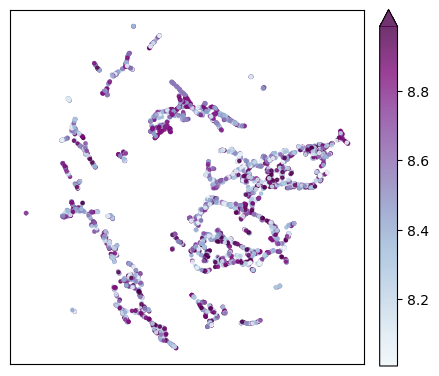

In [4]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


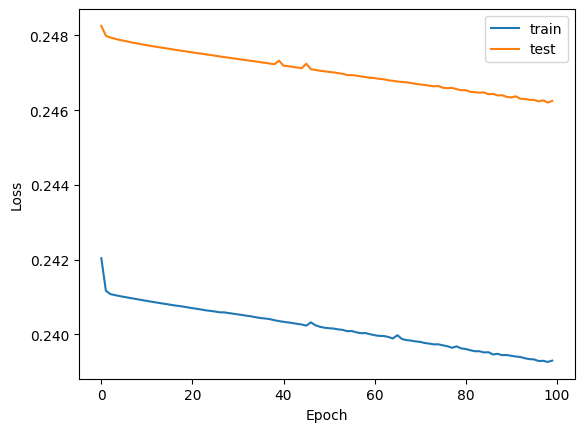

In [5]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 2a

- Input flux: flux_prereduced - flux_conti
- NN model: Dense with list_linear=[1024, 256, 64, 8]
- Loss: MSE

In [6]:
logdir_exp = logdir_expf('20230221/015825_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:11:15 2023 Construct fuzzy simplicial set
Tue Feb 21 22:11:15 2023 Finding Nearest Neighbors
Tue Feb 21 22:11:15 2023 Building RP forest with 8 trees
Tue Feb 21 22:11:15 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Feb 21 22:11:15 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:11:15 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:11:18 2023 Finished embedding


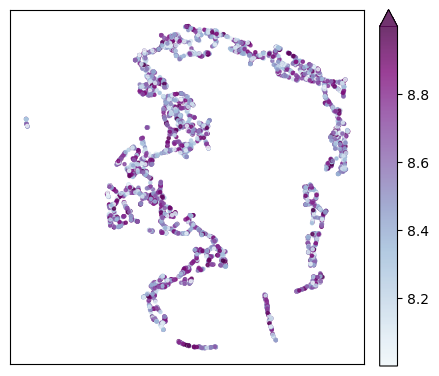

In [7]:
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])

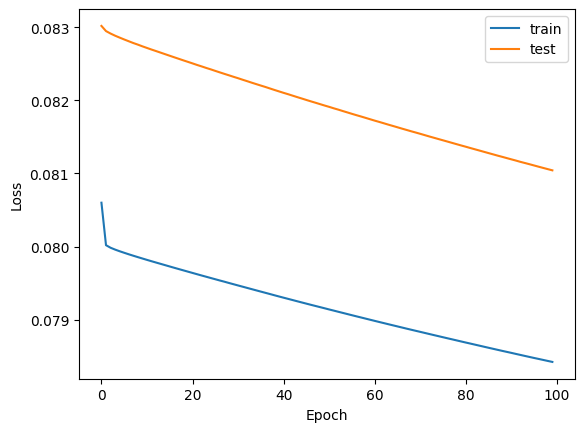

In [8]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 2b

- Input flux: flux_prereduced - flux_conti
- NN model: Dense with list_linear=[64, 64, 64, 64, 8]
- Loss: MSE

In [9]:
logdir_exp = logdir_expf('20230221/150849_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:13:48 2023 Construct fuzzy simplicial set
Tue Feb 21 22:13:48 2023 Finding Nearest Neighbors
Tue Feb 21 22:13:48 2023 Building RP forest with 8 trees
Tue Feb 21 22:13:48 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Feb 21 22:13:48 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:13:48 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:13:50 2023 Finished embedding


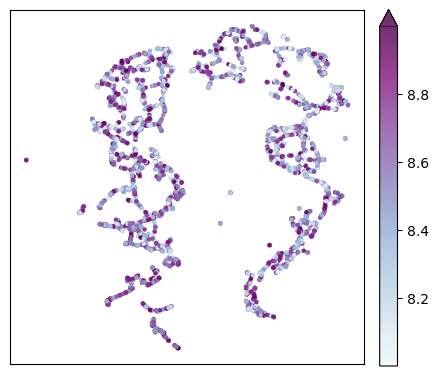

In [10]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


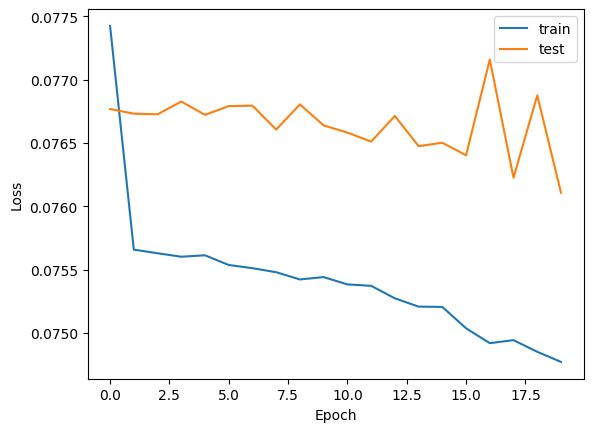

In [11]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 2c

- Input flux: flux_prereduced - flux_conti
- NN model: 1D conv with kernel_size=50, stride=2, maxpool1d kernel_size=5, flatten dim=768, and linear layers [32, 8]
- Loss: MSE

In [12]:
logdir_exp = logdir_expf('20230221/182457_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:17:44 2023 Construct fuzzy simplicial set
Tue Feb 21 22:17:44 2023 Finding Nearest Neighbors
Tue Feb 21 22:17:44 2023 Building RP forest with 8 trees
Tue Feb 21 22:17:44 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Tue Feb 21 22:17:44 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:17:44 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]

Tue Feb 21 22:17:47 2023 Finished embedding


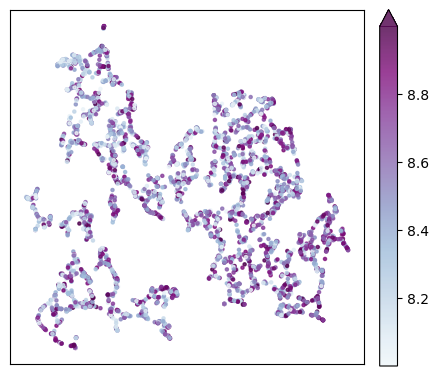

In [13]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


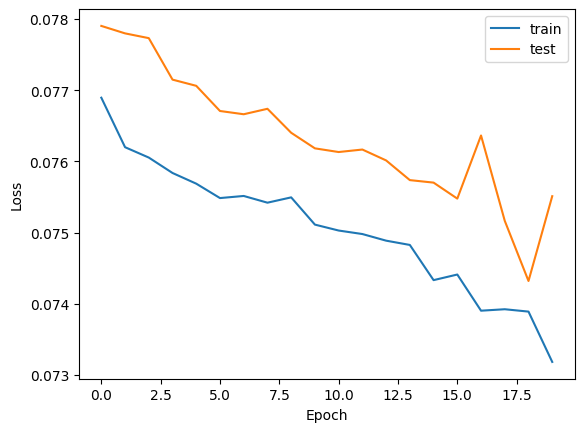

In [14]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 3a

- Input flux: flux_line
- NN model: Dense with list_linear=[256, 64, 8]
- Loss: MSE

In [15]:
logdir_exp = logdir_expf('20230221/154806_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:22:01 2023 Construct fuzzy simplicial set
Tue Feb 21 22:22:01 2023 Finding Nearest Neighbors
Tue Feb 21 22:22:01 2023 Building RP forest with 8 trees
Tue Feb 21 22:22:01 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Feb 21 22:22:01 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:22:01 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:22:04 2023 Finished embedding


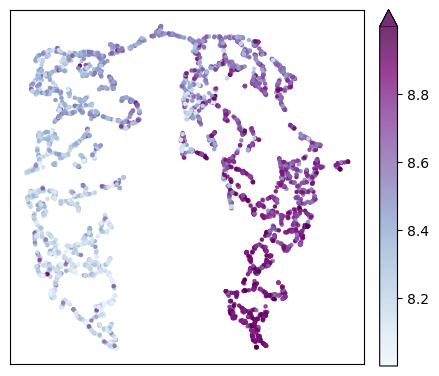

In [16]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


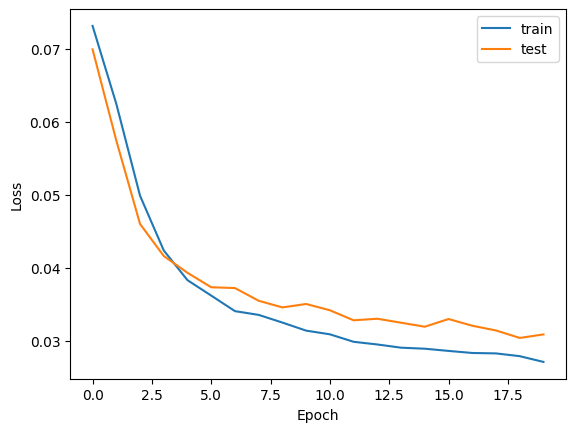

In [17]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 3b

- Input flux: flux_line
- NN model: Dense with list_linear=[64, 64, 64, 8]
- Loss: MSE

In [18]:
logdir_exp = logdir_expf('20230221/152738_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:22:35 2023 Construct fuzzy simplicial set
Tue Feb 21 22:22:35 2023 Finding Nearest Neighbors
Tue Feb 21 22:22:35 2023 Building RP forest with 8 trees
Tue Feb 21 22:22:35 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Feb 21 22:22:35 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:22:35 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]

Tue Feb 21 22:22:37 2023 Finished embedding


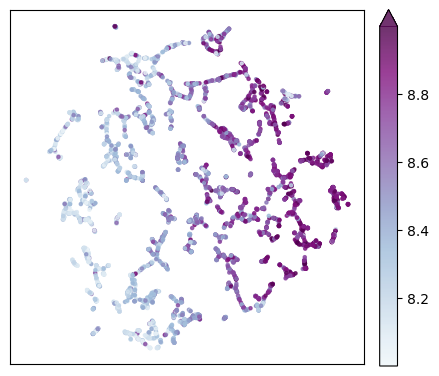

In [19]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


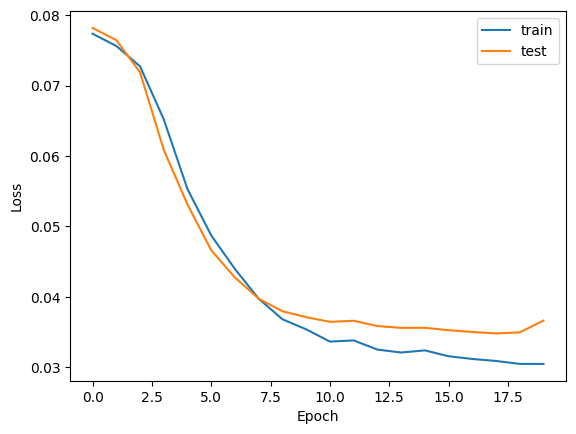

In [20]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 3c

- Input flux: flux_line
- NN model: 1D conv with kernel_size=50, stride=2, maxpool1d kernel_size=5, flatten dim=128, and linear layers [32, 8]
- Loss: MSE

In [21]:
logdir_exp = logdir_expf('20230221/175446_LOGMBH_HB')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:24:19 2023 Construct fuzzy simplicial set
Tue Feb 21 22:24:19 2023 Finding Nearest Neighbors
Tue Feb 21 22:24:19 2023 Building RP forest with 8 trees
Tue Feb 21 22:24:19 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Tue Feb 21 22:24:19 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:24:19 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:24:21 2023 Finished embedding


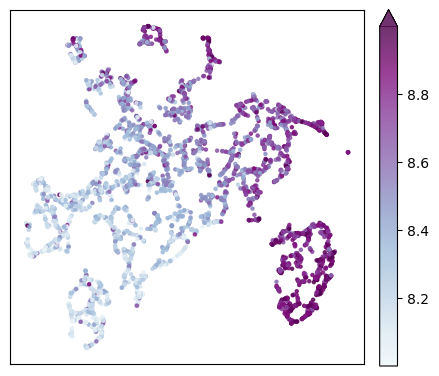

In [22]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


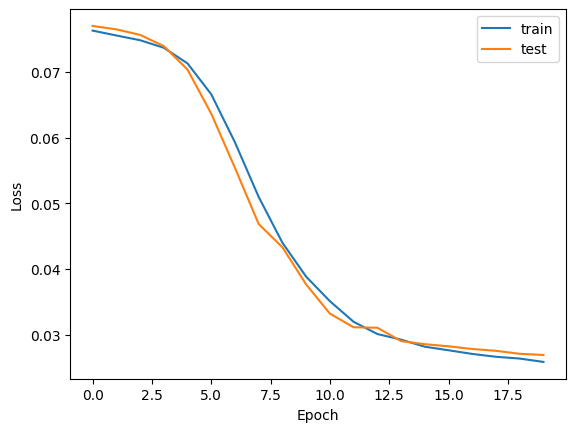

In [23]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

### Experiment 3d

- Input flux: flux_line of MgII
- NN model: Dense with list_linear=[256, 64, 8]
- Loss: MSE

In [24]:
logdir_exp = logdir_expf('20230221/160717_LOGMBH_MGII')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(n_neighbors=5, random_state=42, verbose=True)
Tue Feb 21 22:24:28 2023 Construct fuzzy simplicial set
Tue Feb 21 22:24:28 2023 Finding Nearest Neighbors
Tue Feb 21 22:24:28 2023 Building RP forest with 8 trees
Tue Feb 21 22:24:28 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Feb 21 22:24:28 2023 Finished Nearest Neighbor Search
Tue Feb 21 22:24:28 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:02]


Tue Feb 21 22:24:30 2023 Finished embedding


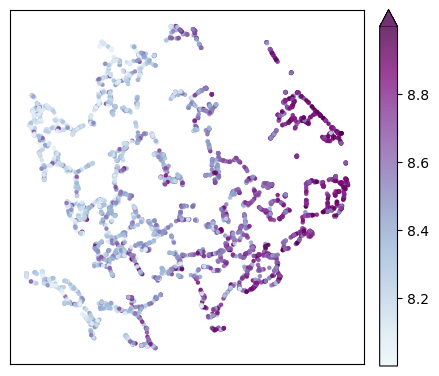

In [25]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_neighbors=5, n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'])
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


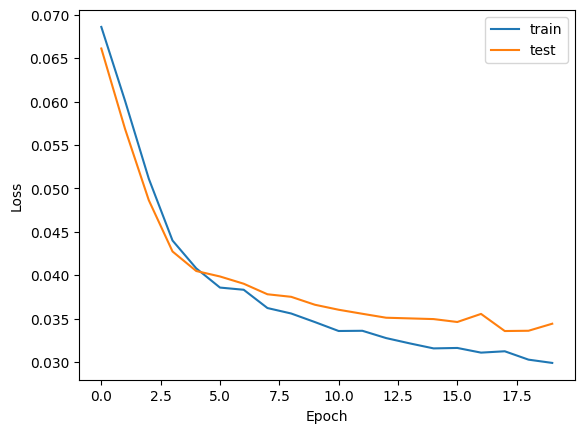

In [26]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))